In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import codebase

In [2]:
res_shp = codebase.load_data.load_GRanD()

ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/ann_scheliga/.conda/envs/rioxarray_env/share/proj failed


In [3]:
from codebase import volume_pipeline

In [4]:
# Step 1 wrapper function works
dem_DA , fw_DA = volume_pipeline.create_aligned_DEM_CYGNSS_subsets('Indirasagar',res_shp)

In [5]:
# Step 2 function works
fw_diff_DA = volume_pipeline.difference_over_time(fw_DA)

In [6]:
# Step 3 single timestep and vectorized work.
change_cond_DA = volume_pipeline.decide_expansion_or_shrinkage_vectorize(fw_diff_DA)

# Testing out vectorization of Step 3 (label as expand/shrink for each timestep)
test_vectorized = xr.apply_ufunc(volume_pipeline.decide_expansion_or_shrinkage_timestep,
                                 fw_diff_DA,input_core_dims=[['lat','lon']],vectorize=True)

In [7]:
# Step 4 wrapper function works
from scipy.stats import norm
change_cond_time0 = change_cond_DA.isel(time=0)
fw_diff_time0 = fw_diff_DA.isel(time=0)
fw_time0 = fw_DA.isel(time=0)
start_params = volume_pipeline.fit_DEM_distribution_from_conditional_area(dem_DA, fw_time0, 1, norm)
change_params = volume_pipeline.fit_DEM_distribution_from_conditional_area(dem_DA, fw_diff_time0, change_cond_time0, norm)
print('params of start timestep:',start_params)
print('params of change in area:',change_params)

params of start timestep: (257.2609612698588, 17.42481840990914)
params of change in area: (259.5148348731124, 16.753825029340693)


In [8]:
## Could not vectorize the Step 4 function(s). Skipped vectorization and made for loop functions :(

# from xarray import DataArray
# def grab_DEM_of_conditional_area(
#     dem_DA: DataArray, cond_DA: DataArray, cond: int = 1
# ) -> DataArray:
#     print(type(dem_DA), type(cond_DA) , cond)
#     print(dem_DA.shape)
#     dem_cond_area = dem_DA.where(cond_DA == cond)
#     return dem_cond_area


# xr.apply_ufunc(grab_DEM_of_conditional_area,
#                fw_DA,input_core_dims=[['lat','lon']],kwargs={'dem_DA':dem_DA},
#               vectorize=True, output_core_dims=['time'])

# xr.apply_ufunc(volume_pipeline.fit_DEM_distribution_from_conditional_area,
#                dem_DA,fw_DA[:-1,:,:],change_cond_DA,norm,
#               input_core_dims=[['lat','lon'],['lat','lon'],[],[]],
#               vectorize=True, join='right')

In [9]:
test_params = volume_pipeline.loop_through_time_series_to_get_fit_params(dem_DA,fw_diff_DA,change_cond_DA,norm)

In [13]:
test_heights = volume_pipeline.calculate_height_time_series_from_start_and_change_in_DEM(dem_DA,fw_DA,fw_diff_DA,change_cond_DA)

In [23]:
test_heights

array([ 2.2538736 ,  3.22785457,  0.        ,  3.21247809,  0.        ,
        0.        ,  0.        ,  0.        ,  9.18580973,  1.93724739,
        4.41165882,  0.        ,  2.01616188, -0.09478783, -0.70998637,
        0.40404311,  0.        ,  0.        ,  0.        ,  0.        ,
        5.67006389,  3.55463398,  0.        ,  1.03288812,  4.2520552 ,
        5.07889366,  1.04772569,  0.        ,  0.98399098, -5.5835981 ,
        0.        , 11.95120005,  5.34048783,  6.34050226,  0.        ,
        0.        ,  4.01452676,  8.09488435, -0.18180305,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  6.8779303 ,
        0.        ,  0.72629526,  0.        ,  4.09133566, -1.71592322,
       -2.3914336 ,  1.34487293,  0.        ,  0.        ,  9.62515123,
        0.        ])

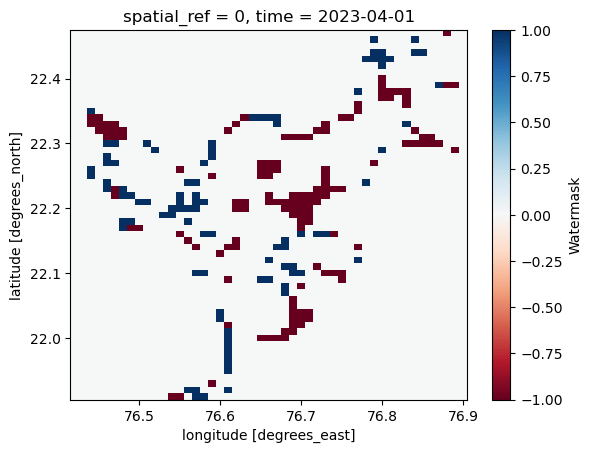

In [26]:
fw_diff_DA.isel(time=-1).plot(cmap='RdBu')

In [ ]:
test_params[0]

In [ ]:
np.isnan(test_params[0], test_params[1])